This image is: <class 'numpy.ndarray'> with dimensions: (480, 640, 3)


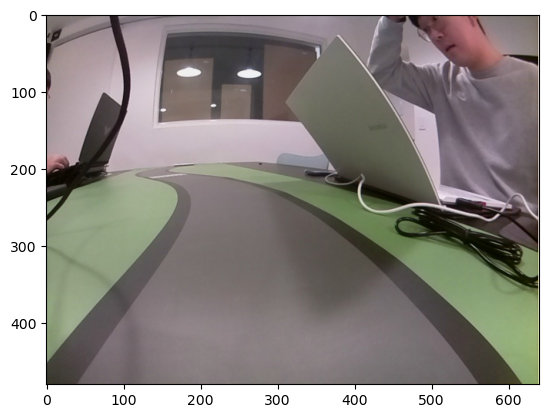

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
%matplotlib inline

# reading in an image
image = mpimg.imread('raspi_test.jpg')
# printing out some stats and plotting the image
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)
plt.show()

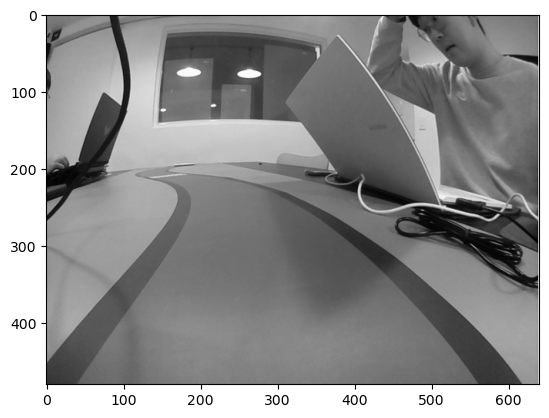

In [2]:
def grayscale(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray=grayscale(image)
plt.imshow(gray,cmap='gray')
plt.show()

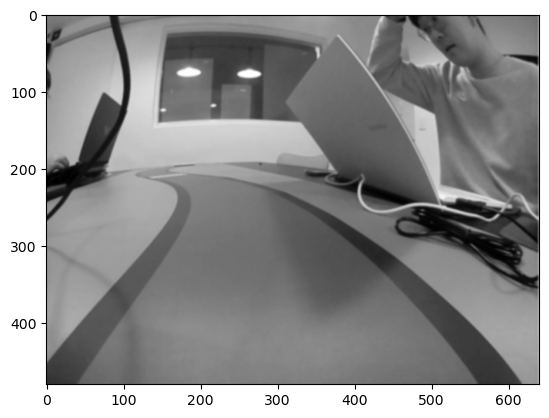

In [3]:
def gaussian_blur(img,kernel_size):
    return cv2.GaussianBlur(img,(kernel_size,kernel_size),0)

kernel_size=5
blur_gray=gaussian_blur(gray,kernel_size)

plt.imshow(blur_gray,cmap='gray')
plt.show()

In [17]:
#grayscale
def grayscale(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#blur
def gaussian_blur(img,kernel_size):
    return cv2.GaussianBlur(img,(kernel_size,kernel_size),0)
#canny
def canny(img,low_threshold,high_threshold):
    return cv2.Canny(img,low_threshold,high_threshold)
#관심영역 설정
def region_of_interest(img,vertices):
    mask=np.zeros_like(img)

    if len(image.shape)>2:
        channel_count=image.shape[2]
        ignore_mask_color=(255,)*channel_count
    else:
        ignore_mask_color=255

    cv2.fillPoly(mask,vertices,ignore_mask_color)
    
    masked_image=cv2.bitwise_and(img,mask)
    return masked_image

def draw_lines(img,lines,color=[255,0,0],thickness=5):
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img,(x1,y1),(x2,y2),color,thickness)

def hough_lines(img,rho,theta,threshold,min_line_len,max_line_gap):
    lines=cv2.HoughLinesP(img,rho,theta,threshold,np.array([]),minLineLength=min_line_len,maxLineGap=max_line_gap)
    line_img=np.zeros((image.shape[0],image.shape[1],3),dtype=np.uint8)
    draw_lines(line_img,lines)
    return line_img

def weighted_img(img,initial_img,a=0.8,b=1.,c=0.):
    return cv2.addWeighted(initial_img,a,img,b,c)

kernel_size=5
low_threshold=50
high_threshold=200

gray=grayscale(image)
blur_gray=gaussian_blur(gray,kernel_size)
edges=canny(blur_gray,low_threshold,high_threshold)
mask=np.zeros_like(image)

if len(image.shape)>2:
    channel_count=image.shape[2]
    ignore_mask_color=(255,)*channel_count
else:
    ignore_mask_color=255

imshape=image.shape
vertices = np.array([[(0,imshape[0]),(100, imshape[0]/2), (500, imshape[0]/2), (imshape[1],imshape[0])]], dtype=np.int32)
mask=region_of_interest(edges,vertices)

rho=0.5
theta=np.pi/180
threshold=90
min_line_len=120
max_line_gap=150

lines=hough_lines(mask,rho,theta,threshold,min_line_len,max_line_gap)
lines_edges=weighted_img(lines,image,a=0.8,b=1.,c=0.)

plt.imshow(lines_edges)
plt.show()

TypeError: 'NoneType' object is not iterable

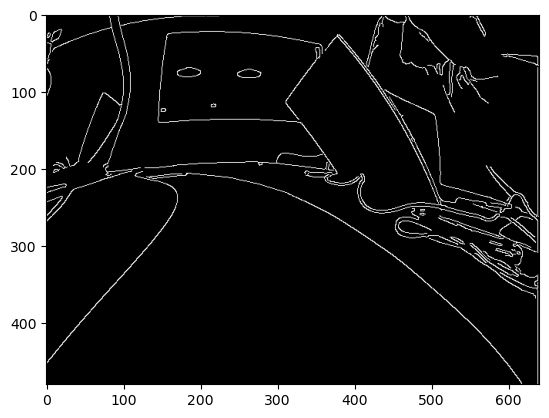

In [4]:
def canny(img,low_threshold,high_threshold):
    return cv2.Canny(img,low_threshold,high_threshold)
low_threshold=50
high_threshold=200
edges=canny(blur_gray,low_threshold,high_threshold)

plt.imshow(edges,cmap='gray')
plt.show()

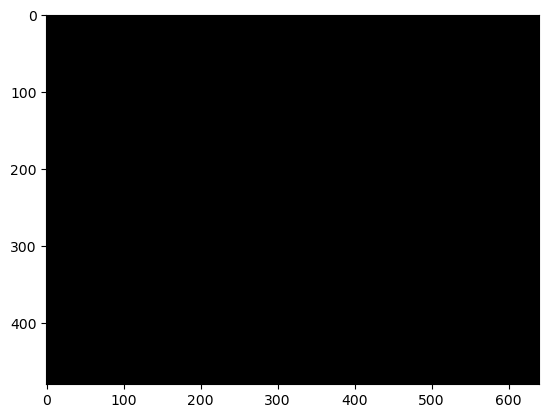

In [5]:
mask=np.zeros_like(image)

plt.imshow(mask,cmap='gray')
plt.show()

(807, 1435, 3)


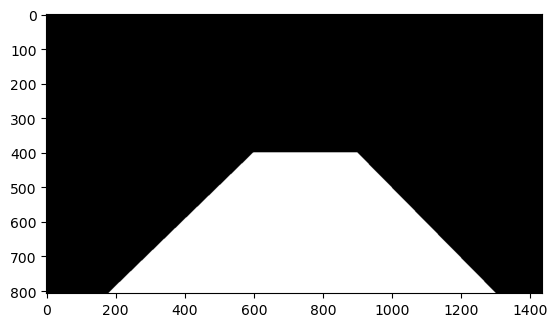

In [91]:
if len(image.shape)>2:
    channel_count=image.shape[2]
    ignore_mask_color=(255,)*channel_count
else:
    ignore_mask_color=255

imshape=image.shape
print(imshape)

vertices=np.array([[(180,imshape[0]),(600,400),(900,400),(1300,imshape[0])]],dtype=np.int32)
#vertices = np.array([[(0,height),(0, height/2), (width, height/2), (width,height)]], dtype=np.int32)
cv2.fillPoly(mask,vertices,ignore_mask_color)

plt.imshow(mask,cmap='gray')
plt.show()

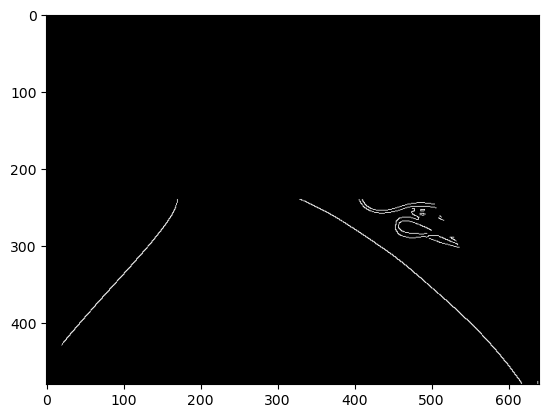

In [12]:
def region_of_interest(img,vertices):
    mask=np.zeros_like(img)

    if len(image.shape)>2:
        channel_count=image.shape[2]
        ignore_mask_color=(255,)*channel_count
    else:
        ignore_mask_color=255

    cv2.fillPoly(mask,vertices,ignore_mask_color)
    
    masked_image=cv2.bitwise_and(img,mask)
    return masked_image


imshape=image.shape
#vertices=np.array([[(180,imshape[0]),(600,400),(900,400),(1300,imshape[0])]],dtype=np.int32)
vertices = np.array([[(0,imshape[0]),(100, imshape[0]/2), (500, imshape[0]/2), (imshape[1],imshape[0])]], dtype=np.int32)
mask=region_of_interest(edges,vertices)

plt.imshow(mask,cmap='gray')
plt.show()

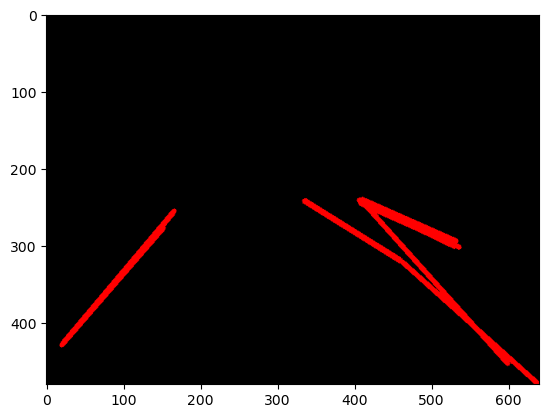

In [13]:
def draw_lines(img,lines,color=[255,0,0],thickness=5):
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img,(x1,y1),(x2,y2),color,thickness)

def hough_lines(img,rho,theta,threshold,min_line_len,max_line_gap):
    lines=cv2.HoughLinesP(img,rho,theta,threshold,np.array([]),minLineLength=min_line_len,maxLineGap=max_line_gap)
    line_img=np.zeros((image.shape[0],image.shape[1],3),dtype=np.uint8)
    draw_lines(line_img,lines)
    return line_img

rho=5
theta=np.pi/180
threshold=90
min_line_len=120
max_line_gap=150


lines=hough_lines(mask,rho,theta,threshold,min_line_len,max_line_gap)

plt.imshow(lines,cmap='gray')
plt.show()

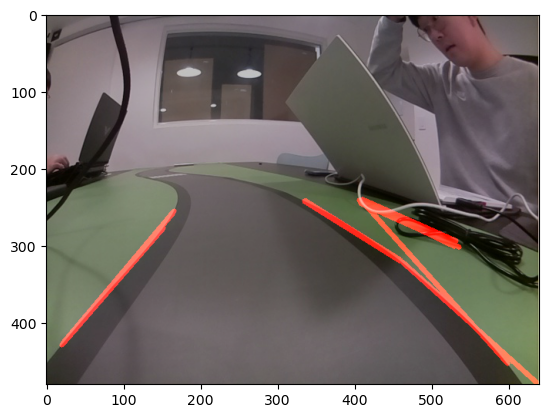

In [14]:
def weighted_img(img,initial_img,a=0.8,b=1.,c=0.):
    return cv2.addWeighted(initial_img,a,img,b,c)

lines_edges=weighted_img(lines,image,a=0.8,b=1.,c=0.)

plt.imshow(lines_edges)
plt.show()

In [81]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def draw_lines(img, lines, color=[255, 0, 0], thickness=3):
    line_img = np.zeros(
        (
            img.shape[0],
            img.shape[1],
            3
        ),
        dtype=np.uint8
    )
    img = np.copy(img)
    if lines is None:
        return
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_img, (x1, y1), (x2, y2), color, thickness)
    img = cv2.addWeighted(img, 0.8, line_img, 1.0, 0.0)
    return img

def pipeline(image):
    """
    An image processing pipeline which will output
    an image with the lane lines annotated.
    """
    height = image.shape[0]
    width = image.shape[1]
    region_of_interest_vertices = [
        (0, height),
        (width / 2, height / 2),
        (width, height),
    ]
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    cannyed_image = cv2.Canny(gray_image, 50, 150)
 
    cropped_image = region_of_interest(
        cannyed_image,
        np.array(
            [region_of_interest_vertices],
            np.int32
        ),
    )
 
    lines = cv2.HoughLinesP(
        cropped_image,
        rho=1,
        theta=np.pi / 180,
        threshold=50,
        lines=np.array([]),
        minLineLength=100,
        maxLineGap=50
    )
 
    left_line_x = []
    left_line_y = []
    right_line_x = []
    right_line_y = []
 
    for line in lines:
        for x1, y1, x2, y2 in line:
            slope = (y2 - y1) / (x2 - x1)
            if math.fabs(slope) < 0.5:
                continue
            if slope <= 0:
                left_line_x.extend([x1, x2])
                left_line_y.extend([y1, y2])
            else:
                right_line_x.extend([x1, x2])
                right_line_y.extend([y1, y2])
    min_y = int(image.shape[0] * (3 / 5))
    max_y = int(image.shape[0])
    poly_left = np.poly1d(np.polyfit(
        left_line_y,
        left_line_x,
        deg=1
    ))
 
    left_x_start = int(poly_left(max_y))
    left_x_end = int(poly_left(min_y))
 
    poly_right = np.poly1d(np.polyfit(
        right_line_y,
        right_line_x,
       deg=1
    ))
 
    right_x_start = int(poly_right(max_y))
    right_x_end = int(poly_right(min_y))
    line_image = draw_lines(
        image,
        [[
            [left_x_start, max_y, left_x_end, min_y],
            [right_x_start, max_y, right_x_end, min_y],
        ]],
        thickness=5,
    )
    return line_image

from moviepy.editor import VideoFileClip
from IPython.display import HTML
white_output = 'test5_output.mp4'
clip1 = VideoFileClip("test5.mp4")
white_clip = clip1.fl_image(pipeline)
white_clip.write_videofile(white_output, audio=False)










                                  







                                          






                                             





                                           




                                              



                                                    


                                                       

                                                          
                                                                









                                  










                               



































t:  51%|█████     | 127/251 [1:22:49<00:03, 37.68it/s, now=None]



























                                  







                                          






                                             





                                           




                                              



                                                    


       

Moviepy - Building video test5_output.mp4.
Moviepy - Writing video test5_output.mp4



TypeError: expected non-empty vector for x

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def draw_lines(img, lines, color=[255, 0, 0], thickness=3):
    line_img = np.zeros_like(img)
    img = np.copy(img)
    if lines is None:
        return
    left_line_x = []
    left_line_y = []
    right_line_x = []
    right_line_y = []
    
    for line in lines:
        for x1, y1, x2, y2 in line:
            slope = (y2 - y1) / (x2 - x1)
            if math.fabs(slope) < 0.5:
                continue
            if slope <= 0:
                left_line_x.extend([x1, x2])
                left_line_y.extend([y1, y2])
            else:
                right_line_x.extend([x1, x2])
                right_line_y.extend([y1, y2])

    try:
        if len(left_line_x) > 1 and len(left_line_y) > 1:
            left_poly = np.polyfit(left_line_y, left_line_x, deg=2)
            left_fit = np.poly1d(left_poly)

            for y in range(img.shape[0]//2, img.shape[0]):
                x = int(left_fit(y))
                if x >= 0:  # Ensure x is non-negative
                    cv2.circle(line_img, (x, y), 2, color, thickness)
    except Exception as e:
        print("Left Polyfit Error:", e)

    try:
        if len(right_line_x) > 1 and len(right_line_y) > 1:
            right_poly = np.polyfit(right_line_y, right_line_x, deg=2)
            right_fit = np.poly1d(right_poly)

            for y in range(img.shape[0]//2, img.shape[0]):
                x = int(right_fit(y))
                if x >= 0:  # Ensure x is non-negative
                    cv2.circle(line_img, (x, y), 2, color, thickness)
    except Exception as e:
        print("Right Polyfit Error:", e)

    img = cv2.addWeighted(img, 0.8, line_img, 1.0, 0.0)
    return img

def pipeline(image):
    height = image.shape[0]
    width = image.shape[1]
    region_of_interest_vertices = [
        (width / 5, height),
        (width*0.4, height *0.6),
        (width*0.6, height *0.6),
        (width, height)
    ]
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    cannyed_image = cv2.Canny(gray_image, 50, 150)

    cropped_image = region_of_interest(
        cannyed_image,
        np.array(
            [region_of_interest_vertices],
            np.int32
        ),
    )

    lines = cv2.HoughLinesP(
        cropped_image,
        # rho=4,
        # theta=np.pi / 60,
        # threshold=160,
        # lines=np.array([]),
        # minLineLength=40,
        # maxLineGap=25
        rho=5,
        theta=np.pi/180,
        threshold=90,
        lines=np.array([]),
        minLineLength=120,
        maxLineGap=150
    )

    line_image = draw_lines(image, lines, thickness=5)
    return line_image


from moviepy.editor import VideoFileClip
from IPython.display import HTML
white_output = 'test5_output.mp4'
clip1 = VideoFileClip("test5.mp4")
white_clip = clip1.fl_image(pipeline)
white_clip.write_videofile(white_output, audio=False)

Moviepy - Building video test5_output.mp4.
Moviepy - Writing video test5_output.mp4



Moviepy - Done !
Moviepy - video ready test5_output.mp4


In [59]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
import numpy as np
import cv2
import math
%matplotlib inline

#grayscale
def grayscale(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#blur
def gaussian_blur(img,kernel_size):
    return cv2.GaussianBlur(img,(kernel_size,kernel_size),0)
#canny
def canny(img,low_threshold,high_threshold):
    return cv2.Canny(img,low_threshold,high_threshold)
#관심영역 설정
def region_of_interest(img,vertices):
    mask=np.zeros_like(img)

    if len(img.shape)>2:
        channel_count=img.shape[2]
        ignore_mask_color=(255,)*channel_count
    else:
        ignore_mask_color=255

    cv2.fillPoly(mask,vertices,ignore_mask_color)
    
    masked_image=cv2.bitwise_and(img,mask)
    return masked_image

def draw_lines(img,lines,color=[255,0,0],thickness=5):
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img,(x1,y1),(x2,y2),color,thickness)

def hough_lines(img,rho,theta,threshold,min_line_len,max_line_gap):
    lines=cv2.HoughLinesP(img,rho,theta,threshold,np.array([]),minLineLength=min_line_len,maxLineGap=max_line_gap)
    line_img=np.zeros((img.shape[0],img.shape[1],3),dtype=np.uint8)
    draw_lines(line_img,lines)
    return line_img

def weighted_img(img,initial_img,a=0.8,b=1.,c=0.):
    return cv2.addWeighted(initial_img,a,img,b,c)

def find_vanishing_point(lines, imshape):
    # Extract coordinates of lines
    coords = []
    for line in lines:
        for x1, y1, x2, y2 in line:
            coords.extend([(x1, y1), (x2, y2)])

    # Use linear regression to find vanishing point
    vx, vy, cx, cy = cv2.fitLine(np.array(coords, dtype=np.int32), cv2.DIST_L2, 0, 0.01, 0.01)

    # Calculate slope and intercept
    slope = vy / vx
    intercept = cy - (slope * cx)

    # Calculate vanishing point coordinates
    vanishing_point_x = int((imshape[0] - intercept) / slope)
    vanishing_point_y = imshape[0]

    return vanishing_point_x, vanishing_point_y

kernel_size=3
low_threshold=70
high_threshold=210

rho=1
theta=np.pi/180
threshold=30
min_line_len=10
max_line_gap=20


while True:
    img=cv2.imread('slope_test.jpg')

    gray=grayscale(img)
    blur_gray=gaussian_blur(gray,kernel_size)
    edges=canny(blur_gray,low_threshold,high_threshold)
    mask=np.zeros_like(img)

    if len(img.shape)>2:
        channel_count=img.shape[2]
        ignore_mask_color=(255,)*channel_count
    else:
        ignore_mask_color=255

    imshape=img.shape
    vertices=np.array([[(50,imshape[0]),(imshape[1]*2/5,imshape[0]/2),(imshape[1]*3/5,imshape[0]/2),(imshape[1]-50,imshape[0])]],dtype=np.int32)
    # vertices=np.array([[(180,imshape[0]),(600,400),(900,400),(1300,imshape[0])]],dtype=np.int32)
    mask=region_of_interest(edges,vertices)


    lines=hough_lines(mask,rho,theta,threshold,min_line_len,max_line_gap)
    lines_edges=weighted_img(lines,img,a=0.8,b=1.,c=0.)

    cv2.imshow('myimg', lines_edges)

    if cv2.waitKey(1) == ord('q'):
        break

#camera.release()
cv2.destroyAllWindows()

In [3]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
import numpy as np
import cv2
import math
%matplotlib inline

#grayscale
def grayscale(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#blur
def gaussian_blur(img,kernel_size):
    return cv2.GaussianBlur(img,(kernel_size,kernel_size),0)
#canny
def canny(img,low_threshold,high_threshold):
    return cv2.Canny(img,low_threshold,high_threshold)
#관심영역 설정
def region_of_interest(img,vertices):
    mask=np.zeros_like(img)

    if len(img.shape)>2:
        channel_count=img.shape[2]
        ignore_mask_color=(255,)*channel_count
    else:
        ignore_mask_color=255

    cv2.fillPoly(mask,vertices,ignore_mask_color)
    
    masked_image=cv2.bitwise_and(img,mask)
    return masked_image

def draw_lines(img,lines,color=[255,0,0],thickness=5):
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img,(x1,y1),(x2,y2),color,thickness)

def hough_lines(img,rho,theta,threshold,min_line_len,max_line_gap):
    lines=cv2.HoughLinesP(img,rho,theta,threshold,np.array([]),minLineLength=min_line_len,maxLineGap=max_line_gap)
    line_img=np.zeros((img.shape[0],img.shape[1],3),dtype=np.uint8)
    draw_lines(line_img,lines)
    return lines

def draw_fit_line(img, lines, color=[255, 0, 0], thickness=10): # 대표선 그리기
        cv2.line(img, (lines[0], lines[1]), (lines[2], lines[3]), color, thickness)

def weighted_img(img,initial_img,a=0.8,b=1.,c=0.):
    return cv2.addWeighted(initial_img,a,img,b,c)

def get_fitline(img, f_lines): # 대표선 구하기   
    lines = np.squeeze(f_lines)
    lines = lines.reshape(lines.shape[0]*2,2)
    rows,cols = img.shape[:2]
    output = cv2.fitLine(lines,cv2.DIST_L2,0, 0.01, 0.01)
    vx, vy, x, y = output[0], output[1], output[2], output[3]
    x1, y1 = int(((img.shape[0]-1)-y)/vy*vx + x) , img.shape[0]-1
    x2, y2 = int(((img.shape[0]/2+100)-y)/vy*vx + x) , int(img.shape[0]/2+100)
    
    result = [x1,y1,x2,y2]
    return result

def find_vanishing_point(lines, imshape):
    # Extract coordinates of lines
    coords = []
    for line in lines:
        for x1, y1, x2, y2 in line:
            coords.extend([(x1, y1), (x2, y2)])

    # Use linear regression to find vanishing point
    vx, vy, cx, cy = cv2.fitLine(np.array(coords, dtype=np.int32), cv2.DIST_L2, 0, 0.01, 0.01)

    # Calculate slope and intercept
    slope = vy / vx
    intercept = cy - (slope * cx)

    # Calculate vanishing point coordinates
    vanishing_point_x = int((imshape[0] - intercept) / slope)
    vanishing_point_y = imshape[0]

    return vanishing_point_x, vanishing_point_y

kernel_size=3
low_threshold=70
high_threshold=210

rho=1
theta=np.pi/180
threshold=30
min_line_len=10
max_line_gap=20


while True:
    img=cv2.imread('slope_test.jpg')

    gray=grayscale(img)
    blur_gray=gaussian_blur(gray,kernel_size)
    edges=canny(blur_gray,low_threshold,high_threshold)
    mask=np.zeros_like(img)

    if len(img.shape)>2:
        channel_count=img.shape[2]
        ignore_mask_color=(255,)*channel_count
    else:
        ignore_mask_color=255

    imshape=img.shape
    vertices=np.array([[(50,imshape[0]),(imshape[1]*2/5,imshape[0]/2),(imshape[1]*3/5,imshape[0]/2),(imshape[1]-50,imshape[0])]],dtype=np.int32)
    # vertices=np.array([[(180,imshape[0]),(600,400),(900,400),(1300,imshape[0])]],dtype=np.int32)
    mask=region_of_interest(edges,vertices)


    lines=hough_lines(mask,rho,theta,threshold,min_line_len,max_line_gap)
    #lines_edges=weighted_img(lines,img,a=0.8,b=1.,c=0.)
    lines = np.squeeze(lines)
    
    # 기울기 구하기
    slope_degree = (np.arctan2(lines[:,1] - lines[:,3], lines[:,0] - lines[:,2]) * 180) / np.pi

    # 수평 기울기 제한
    lines = lines[np.abs(slope_degree)<160]
    slope_degree = slope_degree[np.abs(slope_degree)<160]
    # 수직 기울기 제한
    lines = lines[np.abs(slope_degree)>95]
    slope_degree = slope_degree[np.abs(slope_degree)>95]
    # 필터링된 직선 버리기
    L_lines, R_lines = lines[(slope_degree>0),:], lines[(slope_degree<0),:]
    temp = np.zeros((imshape[0], imshape[1], 3), dtype=np.uint8)
    L_lines, R_lines = L_lines[:,None], R_lines[:,None]
    # 왼쪽, 오른쪽 각각 대표선 구하기
    left_fit_line = get_fitline(img,L_lines)
    right_fit_line = get_fitline(img,R_lines)
    # 대표선 그리기
    draw_fit_line(temp, left_fit_line)
    draw_fit_line(temp, right_fit_line)

    result = weighted_img(temp, img) # 원본 이미지에 검출된 선 overlap
    cv2.imshow('result',result) # 결과 이미지 출력

    #cv2.imshow('myimg', lines_edges)

    if cv2.waitKey(1) == ord('q'):
        break

#camera.release()
cv2.destroyAllWindows()

In [2]:
# -*- coding: cp949 -*-
# -*- coding: utf-8 -*- # 한글 주석쓰려면 이거 해야함
import cv2 # opencv 사용
import numpy as np

def grayscale(img): # 흑백이미지로 변환
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def canny(img, low_threshold, high_threshold): # Canny 알고리즘
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size): # 가우시안 필터
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices, color3=(255,255,255), color1=255): # ROI 셋팅

    mask = np.zeros_like(img) # mask = img와 같은 크기의 빈 이미지
    
    if len(img.shape) > 2: # Color 이미지(3채널)라면 :
        color = color3
    else: # 흑백 이미지(1채널)라면 :
        color = color1
        
    # vertices에 정한 점들로 이뤄진 다각형부분(ROI 설정부분)을 color로 채움 
    cv2.fillPoly(mask, vertices, color)
    
    # 이미지와 color로 채워진 ROI를 합침
    ROI_image = cv2.bitwise_and(img, mask)
    return ROI_image

def draw_lines(img, lines, color=[0, 0, 255], thickness=2): # 선 그리기
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap): # 허프 변환
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    #line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    #draw_lines(line_img, lines)

    return lines

def weighted_img(img, initial_img, α=1, β=1., λ=0.): # 두 이미지 operlap 하기
    return cv2.addWeighted(initial_img, α, img, β, λ)

image = cv2.imread('slope_test.jpg') # 이미지 읽기
height, width = image.shape[:2] # 이미지 높이, 너비

gray_img = grayscale(image) # 흑백이미지로 변환
    
blur_img = gaussian_blur(gray_img, 3) # Blur 효과
        
canny_img = canny(blur_img, 70, 210) # Canny edge 알고리즘

vertices = np.array([[(50,height),(width/2-45, height/2+60), (width/2+45, height/2+60), (width-50,height)]], dtype=np.int32)
ROI_img = region_of_interest(canny_img, vertices) # ROI 설정

lines = hough_lines(ROI_img, 1, 1 * np.pi/180, 30, 10, 20) # 허프 변환
lines = np.squeeze(lines)
    
# 기울기 구하기
slope_degree = (np.arctan2(lines[:,1] - lines[:,3], lines[:,0] - lines[:,2]) * 180) / np.pi

# 수평 기울기 제한
lines = lines[np.abs(slope_degree)<160]
slope_degree = slope_degree[np.abs(slope_degree)<160]
# 수직 기울기 제한
lines = lines[np.abs(slope_degree)>95]
slope_degree = slope_degree[np.abs(slope_degree)>95]
# 필터링된 직선 버리기
L_lines, R_lines = lines[(slope_degree>0),:], lines[(slope_degree<0),:]
temp = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
L_lines, R_lines = L_lines[:,None], R_lines[:,None]
# 직선 그리기
draw_lines(temp, L_lines)
draw_lines(temp, R_lines)

result = weighted_img(temp, image) # 원본 이미지에 검출된 선 overlap
cv2.imshow('result',result) # 결과 이미지 출력
cv2.waitKey(0)

97

: 

In [8]:
import numpy as np
import cv2
import math

def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, vertices, 255)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def draw_lines(img, lines, color=[255, 0, 0], thickness=5):
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), color, thickness)
    
    # Draw vanishing point
    cv2.circle(img, (vanishing_point[0], vanishing_point[1]), 5, (0, 255, 0), -1)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    return lines

def find_vanishing_point(lines, imshape):
    coords = []
    for line in lines:
        x1, y1, x2, y2 = line[0]  # Extract coordinates from the list
        coords.extend([(x1, y1), (x2, y2)])
    
    if len(coords) < 4:
        raise ValueError("Not enough coordinates to find vanishing point")
    
    vx, vy, cx, cy = cv2.fitLine(np.array(coords, dtype=np.int32), cv2.DIST_L2, 0, 0.01, 0.01)
    
    # Calculate vanishing point coordinates
    vanishing_point_x = int((imshape[0] - cy) / vy * vx + cx)
    vanishing_point_y = imshape[0]
    
    return vanishing_point_x, vanishing_point_y

def weighted_img(img, initial_img, a=0.8, b=1., c=0.):
    return cv2.addWeighted(initial_img, a, img, b, c)

kernel_size = 5
low_threshold = 50
high_threshold = 200

rho = 1
theta = np.pi / 180
threshold = 30
min_line_len = 100
max_line_gap = 150

# Load the image
img = cv2.imread('test2.jpg')

# Preprocess the image
gray = grayscale(img)
blur_gray = gaussian_blur(gray, kernel_size)
edges = canny(blur_gray, low_threshold, high_threshold)

# Define region of interest
imshape = img.shape
vertices = np.array([[(50, imshape[0]), (imshape[1] / 5, imshape[0] / 2),
                      (imshape[1] * 4 / 5, imshape[0] / 2), (imshape[1] - 50, imshape[0])]], dtype=np.int32)
mask = region_of_interest(edges, vertices)

# Detect lines using Hough transform
lines = hough_lines(mask, rho, theta, threshold, min_line_len, max_line_gap)

# Find vanishing point
vanishing_point = find_vanishing_point(lines, imshape)

# Draw lines and vanishing point
lines_edges = weighted_img(img, img, a=0.8, b=1., c=0.)
draw_lines(lines_edges, lines)

# Display the image with vanishing point
cv2.imshow('myimg', lines_edges)

# Print vanishing point coordinates
print("Vanishing Point:", vanishing_point)

# Wait for a key press and close the window
cv2.waitKey(0)
cv2.destroyAllWindows()


Vanishing Point: (3071, 807)


In [45]:
import numpy as np
import cv2
import math

# 이전 프레임의 선 정보를 저장할 리스트
lines_history = []

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def draw_lines(img, lines, color=[255, 0, 0], thickness=3):
    line_img = np.zeros_like(img)
    img = np.copy(img)

    if lines is None or len(lines) == 0:
        return img

    # Draw the average lines
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_img, (x1, y1), (x2, y2), color, thickness)

    img = cv2.addWeighted(img, 0.8, line_img, 1.0, 0.0)

    # 선 정보를 저장
    lines_history.append(lines)
    # 최근 10프레임의 선 정보만 유지
    if len(lines_history) > 10:
        lines_history.pop(0)

    # 이전 10프레임의 선 정보를 이용해 평균치 계산
    average_lines = np.mean(lines_history, axis=0, dtype=np.int32)
    result = np.copy(img)
    for line in average_lines:
        x1, y1, x2, y2 = line
        cv2.line(result, (x1, y1), (x2, y2), color, thickness)

    return result


def pipeline(image):
    height = image.shape[0]
    width = image.shape[1]
    region_of_interest_vertices = [
        (width / 5, height),
        (width*0.4, height *0.6),
        (width*0.6, height *0.6),
        (width, height)
    ]
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    cannyed_image = cv2.Canny(gray_image, 50, 150)

    cropped_image = region_of_interest(
        cannyed_image,
        np.array(
            [region_of_interest_vertices],
            np.int32
        ),
    )

    lines = cv2.HoughLinesP(
        cropped_image,
        rho=5,
        theta=np.pi/180,
        threshold=90,
        lines=np.array([]),
        minLineLength=120,
        maxLineGap=150
    )
    line_image = draw_lines(image, lines, thickness=5)
    return line_image

from moviepy.editor import VideoFileClip
from IPython.display import HTML

def process_video(input_video, output_video):
    clip = VideoFileClip(input_video)
    processed_clip = clip.fl_image(pipeline)
    processed_clip.write_videofile(output_video, audio=False)

# Process the video
input_video = 'test5.mp4'
output_video = 'test5_output_with_average.mp4'
process_video(input_video, output_video)


ValueError: not enough values to unpack (expected 4, got 1)